## Mini Project III

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Banking behavior 
## Customer DataFrame
### Cleaning

In [2]:
# Get customer dataframe from csv
customer = pd.read_csv('twm_customer.csv', delimiter= ';')
customer.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [3]:
# Get accounts dataframe from csv
accounts = pd.read_csv('twm_accounts.csv', delimiter= ';')
accounts.head()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [4]:
# Remove useless columns and null values
accounts = accounts.drop(['acct_type', 'account_active', 'acct_start_date', 'acct_end_date', 'starting_balance'], axis=1)
accounts.head()

,acct_nbr,cust_id,ending_balance
0,13628063,1362806,284.58
1,4561143213627090,1362709,496.15
2,4561143213628360,1362836,1000.00
3,13633112,1363311,968.46
4,4561143213633610,1363361,462.28


## Savings DataFrame
### Cleaning

In [5]:
# Get savings dataframe from csv
savings = pd.read_csv('twm_savings_acct.csv', delimiter= ';')
savings.head()

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [6]:
savings['total_savings'] = savings['ending_balance'] - savings['starting_balance']
savings

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,total_savings
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54,9.50
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89,-638.84
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02,3.78
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33,9.07
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35,890.33
...,...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57,351.24
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26,174.73
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14,211.08
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25,-73.71


In [7]:
# Remove useless columns and null values
savings = savings.drop(['minimum_balance', 'acct_type', 'acct_start_date', 'acct_end_date', 'starting_balance', 'ending_balance'], axis=1)
savings.head()

,cust_id,acct_nbr,account_active,total_savings
0,1363160,13631603,Y,9.50
1,1362487,13624873,N,-638.84
2,1362548,13625483,Y,3.78
3,1362752,13627523,Y,9.07
4,1363017,13630173,N,890.33


In [8]:
# Check and remove duplicate ids 
idsUnique = len(set(savings.cust_id))
idsTotal = savings.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [9]:
# Check for missing data
def checkNull(data):
    """Check if data in frame is null"""
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])
    return missing_data.head(20)

missing_data = checkNull(savings)
missing_data

,total,percent
cust_id,0,0.0
acct_nbr,0,0.0
account_active,0,0.0
total_savings,0,0.0


### Merge

In [10]:
# Merge customer & savings dataframe
acc_savings = customer.merge(savings[['cust_id', 'account_active', 'total_savings']].rename(columns={'account_active':'savings_active'}), 
            left_on="cust_id", right_on="cust_id", how="left")
# Fill NaN total_savings values with 0            
acc_savings['total_savings'].fillna(0, inplace=True)
acc_savings


,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_active,total_savings
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,NaN,0.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,NaN,0.00


## Credit DataFrame
### Cleaning

In [15]:
# Get credit dataframe from csv
credit = pd.read_csv('twm_credit_acct.csv', delimiter= ';')
credit.head()


,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00


In [16]:
# Create 'total_debt' feature
credit['debt'] = credit['ending_balance']
credit

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance,debt
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00,1000.00
...,...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00,9200.00


In [17]:
# Remove useless columns and null values
credit = credit.drop(['credit_rating', 'acct_start_date', 'acct_end_date', 'starting_balance', 'ending_balance'], axis=1)
credit.head()

,cust_id,acct_nbr,credit_limit,account_active,debt
0,1363160,4561143213631600,1000,Y,286.69
1,1362487,4561143213624870,3000,Y,1548.23
2,1362548,4561143213625480,6700,Y,68.68
3,1362752,4561143213627520,2400,N,0.00
4,1363017,4561143213630170,1000,Y,1000.00


In [18]:
# Check and remove duplicate ids 
idsUnique = len(set(credit.cust_id))
idsTotal = credit.shape[0]
idsDup = idsTotal - idsUnique
print(idsDup)

0


In [19]:
# Check for missing data
missing_data = checkNull(credit)
missing_data

,total,percent
cust_id,0,0.0
acct_nbr,0,0.0
credit_limit,0,0.0
account_active,0,0.0
debt,0,0.0


### Merge

In [20]:
# Merge customer & savings dataframe
acc_debt = customer.merge(credit[['cust_id', 'account_active', 'debt']].rename(columns={'account_active':'credit_active'}), 
            left_on="cust_id", right_on="cust_id", how="left")
# Fill NaN total_savings values with 0   
acc_debt['debt'].fillna(0, inplace=True)
acc_debt

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,credit_active,debt
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,NaN,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,Y,1548.23
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,286.69
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,N,0.00
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,NaN,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,1300.00
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,Y,9200.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,N,1785.97


## Final Merge 

In [21]:
# Merge credit and savings dataframes to master dataframe
master = acc_savings.merge(acc_debt[['cust_id', 'credit_active', 'debt']], left_on="cust_id", right_on="cust_id", how="left")

# Fill NaN savins_active & credit_active values with 'N'
master['savings_active'].fillna('N', inplace=True)
master['credit_active'].fillna('N', inplace=True)
master

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_active,total_savings,credit_active,debt
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,N,0.00,N,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,N,-638.84,Y,1548.23
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,Y,9.50,Y,286.69
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,Y,9.07,N,0.00
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,Y,3.78,Y,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,N,0.00,N,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,Y,-73.71,Y,1300.00
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,N,0.00,Y,9200.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,N,0.00,N,1785.97


## Scaling

In [22]:
# Get dummy values for savings_active and credit_active
master = master.replace({
                        'savings_active': {'N ': 0, 'N': 0, 'Y ': 1, 'Y': 1},
                        'credit_active': {'N ': 0, 'N': 0, 'Y ': 1, 'Y': 1}
})
master

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code,savings_active,total_savings,credit_active,debt
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV,0,0.00,0,0.00
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA,0,-638.84,1,1548.23
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA,1,9.50,1,286.69
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA,1,9.07,0,0.00
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY,1,3.78,1,68.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA,0,0.00,0,0.00
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY,1,-73.71,1,1300.00
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM,0,0.00,1,9200.00
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL,0,0.00,0,1785.97


In [23]:
# Drop cust_id
master = master.drop(['cust_id', 'street_nbr', 'postal_code'], axis=1)

# Scale using MinMaxScaler
num_feats = master.dtypes[master.dtypes != 'object'].index.tolist()
scaler = MinMaxScaler()
scaled_master = pd.DataFrame(scaler.fit_transform(master[num_feats].astype(float)))

In [24]:
# Add columns back
scaled_master.columns = num_feats
scaled_master

,income,age,years_with_bank,nbr_children,marital_status,savings_active,total_savings,credit_active,debt
0,0.181399,0.434211,0.555556,0.2,0.333333,0.0,0.178426,0.0,0.000000
1,0.045818,0.763158,0.111111,0.0,0.333333,0.0,0.131055,1.0,0.162972
2,0.128665,0.328947,0.888889,0.0,0.000000,1.0,0.179130,1.0,0.030178
3,0.330667,0.539474,0.333333,0.0,0.000000,1.0,0.179098,0.0,0.000000
4,0.309066,0.605263,1.000000,0.4,1.000000,1.0,0.178706,1.0,0.007229
...,...,...,...,...,...,...,...,...,...
742,0.102631,0.302632,0.666667,0.2,1.000000,0.0,0.178426,0.0,0.000000
743,0.183043,0.565789,0.666667,0.2,0.333333,1.0,0.172960,1.0,0.136842
744,0.425231,0.486842,0.000000,0.4,0.333333,0.0,0.178426,1.0,0.968421
745,0.104747,0.315789,0.777778,0.0,0.333333,0.0,0.178426,0.0,0.187997


## PCA

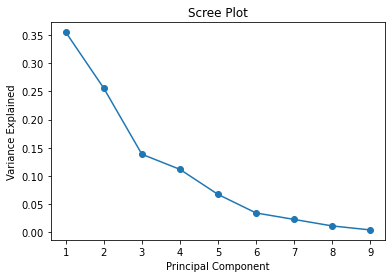

In [29]:
def screePlot(data, n_components=9):
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data)
    pca_fit

    PC_values = np.arange(pca.n_components_) + 1
    PC_values

    plt.plot(PC_values, pca.explained_variance_ratio_, 'o-')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')

scree(scaled_master)

# Export to csv
scaled_master.to_csv('scaled_master_pca.csv')

## Clustering